In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib.pyplot import gca,show
from IPython.display import Math, display
import numpy as np
import scipy as sp
import sympy as sym
from scipy.special import kv,zeta, polygamma, factorial, erf
from scipy import integrate
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Polygon
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as pe
import cmasher as cmr
import mpmath as mp
from scipy.integrate import odeint, solve_ivp, ode, quad
import math
import numpy
from mpmath import *
from sympy import Eq, Symbol, solve
from scipy.interpolate import griddata

In [3]:
alpha1 = 127.9
GF = 1.16e-5
MZ = 91.19
alpha_ = 1.0/alpha1
ee = np.sqrt(4.0*np.pi*alpha_)
vev = 1/np.sqrt(np.sqrt(2.0)*GF)
A = np.sqrt(np.pi*alpha_)*vev
thetaW = numpy.arcsin(2*A/MZ)/2.0
MW = A/np.sin(thetaW)
SW = np.sin(thetaW)
g= ee/np.sin(thetaW)

In [28]:




def MH2(lamh, vh, lamphi,vs,lamhphi):
    return np.sqrt(1/2*(lamh*vh**2 + lamphi*vs**2 + 
                        np.sqrt(lamh**2 * vh**4 + 2*(2*lamhphi**2 - lamh*lamphi)* vh**2*vs**2 +lamphi**2*vs**4)))
def MH(lamh, vh, lamphi,vs,lamhphi):
    return np.sqrt(1/2*(lamh*vh**2 + lamphi*vs**2 - 
                        np.sqrt(lamh**2 * vh**4 + 2*(2*lamhphi**2 - lamh*lamphi)* vh**2*vs**2 +lamphi**2*vs**4)))


def h2totheta(lamh, vh, lamphi, alpha, vs,lamhphi):
    Mh2 = MH2(lamh, vh, lamphi,vs,lamhphi)
    return (Mh2**3*np.cos(alpha)**2)/(64.*np.pi*vs**2)


def h2tohh(lamh, vh, lamphi, alpha, vs, lamhphi):
    Mh2 = MH2(lamh, vh, lamphi,vs,lamhphi)
    Mh = MH(lamh, vh, lamphi,vs,lamhphi)
    if Mh2 > 2*Mh:
        return (9*g**2*Mh**4*np.sqrt(-4*Mh**2 + Mh2**2)*np.sin(alpha)**2)/(256.*Mh2**2*MW**2*np.pi)
    else:
        return 0

def h2tobb(lamh, vh, lamphi, alpha, vs, lamhphi):
    Mh2 = MH2(lamh, vh, lamphi,vs,lamhphi)
    Mh = MH(lamh, vh, lamphi,vs,lamhphi)
    Mb = 4.18
    if Mh2 > 2*Mb:
        return (3*g**2*Mb**2*(-4*Mb**2 + Mh2**2)**1.5*np.sin(alpha)**2)/(64.*Mh2**2*MW**2*np.pi)
    else:
        return 0

    
def h2tott(lamh, vh, lamphi, alpha, vs, lamhphi):
    Mh2 = MH2(lamh, vh, lamphi,vs,lamhphi)
    Mh = MH(lamh, vh, lamphi,vs,lamhphi)
    Mtp = 173.21
    if Mh2 > 2* Mtp:
        return (3*g**2*Mtp**2*(Mh2**2 - 4*Mtp**2)**1.5*np.sin(alpha)**2)/(64.*Mh2**2*MW**2*np.pi)
    else:
        return 0


def h2toss(lamh, vh, lamphi, alpha, vs, lamhphi):
    Mh2 = MH2(lamh, vh, lamphi,vs,lamhphi)
    Mh = MH(lamh, vh, lamphi,vs,lamhphi)
    Ms = 96.0e-3
    if Mh2 > 2*Ms:
        return (3*g**2*Ms**2*(Mh2**2 - 4*Ms**2)**1.5*np.sin(alpha)**2)/(64.*Mh2**2*MW**2*np.pi)
    else:
        return 0


def h2tocc(lamh, vh, lamphi, alpha, vs, lamhphi):
    Mh2 = MH2(lamh, vh, lamphi,vs,lamhphi)
    Mh = MH(lamh, vh, lamphi,vs,lamhphi)
    Mc = 1.27
    if Mh2 > 2* Mc:
        return (3*g**2*Mc**2*(-4*Mc**2 + Mh2**2)**1.5*np.sin(alpha)**2)/(64.*Mh2**2*MW**2*np.pi)
    else:
        return 0


def h2todd(lamh, vh, lamphi, alpha, vs, lamhphi):
    Mh2 = MH2(lamh, vh, lamphi,vs,lamhphi)
    Mh = MH(lamh, vh, lamphi,vs,lamhphi)
    Md = 4.7e-3
    if Mh2 > 2*Md:
        return (3*g**2*Md**2*(-4*Md**2 + Mh2**2)**1.5*np.sin(alpha)**2)/(64.*Mh2**2*MW**2*np.pi)
    else:
        return 0

def h2touu(lamh, vh, lamphi, alpha, vs, lamhphi):
    Mh2 = MH2(lamh, vh, lamphi,vs,lamhphi)
    Mh = MH(lamh, vh, lamphi,vs,lamhphi)
    Mu = 2.2e-3
    if Mh2 > 2* Mu:
        return (3*g**2*Mu**2*(Mh2**2 - 4*Mu**2)**1.5*np.sin(alpha)**2)/(64.*Mh2**2*MW**2*np.pi)
    return 0

def h2toll(lamh, vh, lamphi, alpha, vs, lamhphi):
    Mh2 = MH2(lamh, vh, lamphi,vs,lamhphi)
    Mh = MH(lamh, vh, lamphi,vs,lamhphi)
    Ml = 1.78
    if Mh2 > 2* Ml:
        return (g**2*Ml**2*(Mh2**2 - 4*Ml**2)**1.5*np.sin(alpha)**2)/(64.*Mh2**2*MW**2*np.pi)
    else:
        return 0

def h2tomm(lamh, vh, lamphi, alpha, vs, lamhphi):
    Mh2 = MH2(lamh, vh, lamphi,vs,lamhphi)
    Mh = MH(lamh, vh, lamphi,vs,lamhphi)
    Mm = 105.66e-3
    if Mh2> 2* Mm:
        return (g**2*Mm**2*(Mh2**2 - 4*Mm**2)**1.5*np.sin(alpha)**2)/(64.*Mh2**2*MW**2*np.pi)
    else:
        return 0


def h2toee(lamh, vh, lamphi, alpha, vs, lamhphi):
    Mh2 = MH2(lamh, vh, lamphi,vs,lamhphi)
    Mh = MH(lamh, vh, lamphi,vs,lamhphi)
    Me = 0.51e-3
    if Mh2 > 2*Me:
        return (g**2*Me**2*(-4*Me**2 + Mh2**2)**1.5*np.sin(alpha)**2)/(64.*Mh2**2*MW**2*np.pi)
    else:
        return 0


def h2toww(lamh, vh, lamphi, alpha, vs, lamhphi):
    Mh2 = MH2(lamh, vh, lamphi,vs,lamhphi)
    Mh = MH(lamh, vh, lamphi,vs,lamhphi)
    Mw = 80.38
    if Mh2 > 2* Mw:
        return (g**2*np.sqrt(Mh2**2 - 4*MW**2)*(Mh2**4 - 4*Mh2**2*MW**2 + 12*MW**4)*np.sin(alpha)**2)/(128.*Mh2**2*MW**2*np.pi)
    else:
        return 0

def h2tozz(lamh, vh, lamphi, alpha, vs, lamhphi):
    Mh2 = MH2(lamh, vh, lamphi,vs,lamhphi)
    Mh = MH(lamh, vh, lamphi,vs,lamhphi)
    MZ = 91
    if Mh2 > 2* MZ:
        return (g**2*np.sqrt(Mh2**4 + (4*Mh2**2*MW**2)/(SW**2 - 1))*(12*MW**4 + 4*Mh2**2 *MW**2*(SW**2 -1) + Mh2**4*(SW**2 -1)**2))*np.sin(alpha)**2/(256*Mh2**3*MW**2*np.pi*(SW**2-1)**2)
    else:
        return 0

def total_width(lamh, vh, lamphi, alpha, vs, lamhphi):

    A = h2totheta(lamh, vh, lamphi, alpha, vs, lamhphi)
    B = h2tohh(lamh, vh, lamphi, alpha, vs, lamhphi)
    C = h2tobb(lamh, vh, lamphi, alpha, vs, lamhphi)
    D = h2toss(lamh, vh, lamphi, alpha, vs, lamhphi)
    E = h2tocc(lamh, vh, lamphi, alpha, vs, lamhphi)
    F = h2todd(lamh, vh, lamphi, alpha, vs, lamhphi)
    G = h2touu(lamh, vh, lamphi, alpha, vs, lamhphi)
    H = h2toll(lamh, vh, lamphi, alpha, vs, lamhphi)
    I = h2tomm(lamh, vh, lamphi, alpha, vs, lamhphi)
    J = h2toee(lamh, vh, lamphi, alpha, vs, lamhphi)
    K = h2toww(lamh, vh, lamphi, alpha, vs, lamhphi) 
    L = h2tozz(lamh, vh, lamphi, alpha, vs, lamhphi)
    M = h2tott(lamh, vh, lamphi, alpha, vs, lamhphi)
    return A+B+C+D+E+F+G+H+I+J+L+M+K

In [31]:
#lamh = 0.5
#vh = 246
#lamphi = 1.0e-8
#vs 1.25e6      
#lamhphi = 2.0e-8


#           lamh  vh    lamphi    alpha         vs   lamhphi
total_width(0.26, 246., 1.0e-1, -3.90000e-11, 1.25e6, 2.0e-8)

196.59848478317554

In [30]:
MH(lamh = 0.26, vh = 246, lamphi = 0.1,vs = 1.0e10,lamhphi = 2.0e-8)

123.93546707863734

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

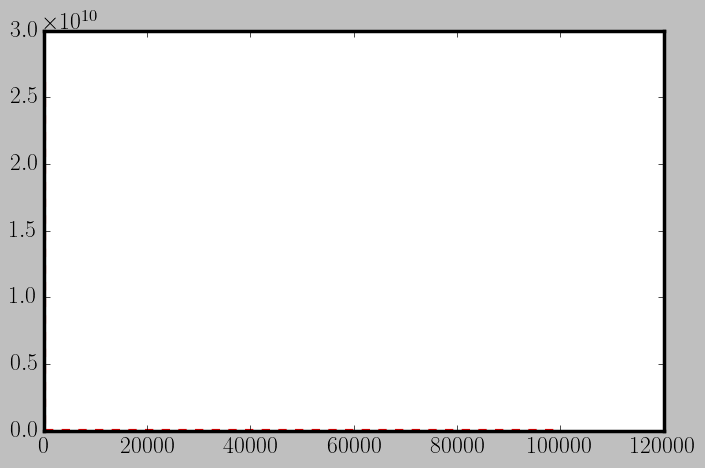

In [19]:
fig = plt.subplots(figsize=(8, 5), dpi =100)
plt.style.use('classic')
plt.rcParams["font.size"] = "17"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 2.5
ax = plt.gca()
mpl.rcParams['hatch.linewidth'] = 3  # previous pdf hatch linewidth
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]



vs_ = np.logspace(-3,8,1000)
vs_a = np.logspace(5.25,8,1000)

lamh = 0.5
vh = 246
lamphi = 1.0e-6
alpha = 1.0e-2

plt.plot(MH2(lamh, vh, lamphi,vs_),h2totheta(lamh, vh, lamphi, alpha, vs_),color = 'red' ,lw = 3,ls = 'dashed', label = '$h_2 \\to \\theta \\theta$')
plt.plot(MH2(lamh, vh, lamphi,vs_),h2tohh(lamh, vh, lamphi, alpha, vs_), color = 'gold',lw = 3,ls = 'dashed', label = "$h_2 \\to h h$")
plt.plot(MH2(lamh, vh, lamphi,vs_), h2tobb(lamh, vh, lamphi, alpha, vs_), color = 'darkgreen' , lw = 3,ls = 'dashed', label = "$h_2 \\to b B$")
plt.plot(MH2(lamh, vh, lamphi,vs_a),  h2tott(lamh, vh, lamphi, alpha, vs_a),color = 'navy' , lw = 3,ls = 'dashed', label = "$h_2 \\to t T$")
plt.plot(MH2(lamh, vh, lamphi,vs_),  h2toss(lamh, vh, lamphi, alpha, vs_),color = 'm', lw = 3,ls = 'dashed', label = "$h_2 \\to s, S$")
plt.plot(MH2(lamh, vh, lamphi,vs_),  h2tocc(lamh, vh, lamphi, alpha, vs_),color = 'darkorange', lw = 3,ls = 'dashed', label = "$h_2 \\to c, C$")
plt.plot(MH2(lamh, vh, lamphi,vs_),  h2todd(lamh, vh, lamphi, alpha, vs_),color = 'yellowgreen', lw = 3,ls = 'dashed', label = "$h_2 \\to d, \\bar{d}$")
plt.plot(MH2(lamh, vh, lamphi,vs_),  h2touu(lamh, vh, lamphi, alpha, vs_),color = 'k', lw = 3,ls = 'dashed', label = "$h_2 \\to u, \\bar{u}$")
plt.plot(MH2(lamh, vh, lamphi,vs_),  h2toll(lamh, vh, lamphi, alpha, vs_), lw = 3,ls = 'dashed', label = "$h_2 \\to \\tau, \\bar{\\tau}$")
plt.plot(MH2(lamh, vh, lamphi,vs_),  h2tomm(lamh, vh, lamphi, alpha, vs_),color = 'aqua', lw = 3,ls = 'dashed', label = "$h_2 \\to \\mu, \\bar{\\mu}$")
plt.plot(MH2(lamh, vh, lamphi,vs_),  h2toee(lamh, vh, lamphi, alpha, vs_), lw = 3,ls = 'dashed', label = "$h_2 \\to e, \\bar{e}$")
plt.plot(MH2(lamh, vh, lamphi,vs_),  h2toww(lamh, vh, lamphi, alpha, vs_), lw = 3,ls = 'dashed', label = "$h_2 \\to W^+, W^-$")
plt.plot(MH2(lamh, vh, lamphi,vs_a),  h2tozz(lamh, vh, lamphi, alpha, vs_a),color ='brown', lw = 3,ls = 'dashed', label = "$h_2 \\to Z, Z$")

plt.plot(vs_,  total_width(lamh, vh, lamphi, alpha, vs_), 'k',  lw = 3, label = "$\\Gamma_{Total}$")


anchored_text_ = AnchoredText(r"$\lambda_{H} = 0.5$" + '\n'\
                              r"$\lambda_{H \phi} = 7.0 \times 10^{-5}$" + '\n'\
                              r"$\lambda_\phi = 1 \times 10^{-6}$" + '\n'\
                              r"$sin(\alpha) = 1 \times 10^{-2}$", loc=4)

ax.add_artist(anchored_text_)

plt.yscale('log')

plt.xlabel('$M_{h_2}$[GeV]')
plt.ylabel('$\Gamma_{h_2}$[GeV]')
plt.legend(bbox_to_anchor=(1.0,0.5) , loc='center left', fontsize = 12)
plt.xlim(-30, 5.0e4)
#plt.ylim(0, 250000000000)
#plt.show()
plt.savefig("h2_decay.pdf", bbox_inches='tight')

In [274]:
def Tr(ge, Gamma):
    Mp = 2.43*10**(18) # Plack Mass GeV
    return (5*np.pi**2/72*ge)**(-1/4)*np.sqrt(Gamma*Mp)
Tr(10, 1.0e-16)

9.634270227224963

In [11]:
total_width(lamh, vh, lamphi, 1.0e-2, vs_)

<ipython-input-3-debb9e7e0759>:19: RuntimeWarning: invalid value encountered in sqrt
  return (9*g**2*Mh**4*np.sqrt(-4*Mh**2 + Mh2**2)*np.sin(alpha)**2)/(256.*Mh2**2*MW**2*np.pi)


array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
      